In [181]:
from urllib.parse import quote
from urllib.request import urlopen
import json
import pandas as pd

In [182]:
user = "SnidelyWhiplash"
# page=1&limit=24&
uri = """https://api.bar-rts.com/replays?page=1&limit=999&hasBots=false&endedNormally=true&players="""
url = uri+quote(user)

In [183]:
data = json.loads(urlopen(url).read().decode("utf-8"))

In [184]:
with open(f"data_{user}.json", "w") as outfile:
    json.dump(data["data"], outfile, indent=4, sort_keys=True)

In [185]:
# Get the winning team and count the number of wins
match = {}
matches = []
for game in data["data"]:
    for team in game["AllyTeams"]:
        for player in team["Players"]:
            if player["name"] == user:
                match = {
                    **match,
                    **{
                        "id": game["id"],
                        "name": player["name"],
                        "winningTeam": team["winningTeam"],
                        "Map.fileName": game["Map"]["fileName"],
                        "Map.scriptName": game["Map"]["scriptName"],
                        "durationMs": game["durationMs"],
                        "startTime": game["startTime"],
                    },
                }
                matches.append(match)

In [186]:
df = pd.json_normalize(matches) #put json inside a dataframe
df

,id,name,winningTeam,Map.fileName,Map.scriptName,durationMs,startTime
0,17b9a06443bfb825bc2f6c42fe311b1e,trash_panda,True,ice_scream_v2.5,Ice Scream v2.5,1578100,2023-07-01T23:39:03.000Z
1,e1b2a0644ffe214a834d76f8d6040351,trash_panda,True,thermal_shock_v1.1,Thermal Shock v1.1,598700,2023-07-01T23:12:33.000Z
2,0490a064eb296cffe355df2caa22c6cf,trash_panda,True,bismuth_valley_v2.2,Bismuth Valley v2.2,1186400,2023-07-01T20:43:48.000Z
3,a989a064b9df73235fdbb8074c2ba057,trash_panda,True,dsdr_4.1,DSDR 4.1,1103733,2023-07-01T20:16:41.000Z
4,ce80a06437859ac563f2aac94e975a29,trash_panda,False,ascendancy_v2.0,Ascendancy v2.0,1209500,2023-07-01T19:38:54.000Z
...,...,...,...,...,...,...,...
702,807f4264ecae8ca1140f9a009f58dd94,trash_panda,True,comet_catcher_remake_1.8,Comet Catcher Remake 1.8,1834767,2023-04-21T12:20:16.000Z
703,767842645c3f920c89eda8cd090fc657,trash_panda,True,comet_catcher_remake_1.8,Comet Catcher Remake 1.8,1706667,2023-04-21T11:50:14.000Z
704,b2674264d970405000e068dfe7d416fb,trash_panda,False,all_that_glitters_1.2,All That Glitters v1.2,2458800,2023-04-21T10:38:42.000Z
705,70604264b58f04e89ab0ee2c3274f5d2,trash_panda,False,comet_catcher_remake_1.8,Comet Catcher Remake 1.8,1273033,2023-04-21T10:07:44.000Z


In [187]:
df['winningTeam'].value_counts(normalize=True)[True] * 100


54.596888260254595

<Figure size 800x600 with 0 Axes>

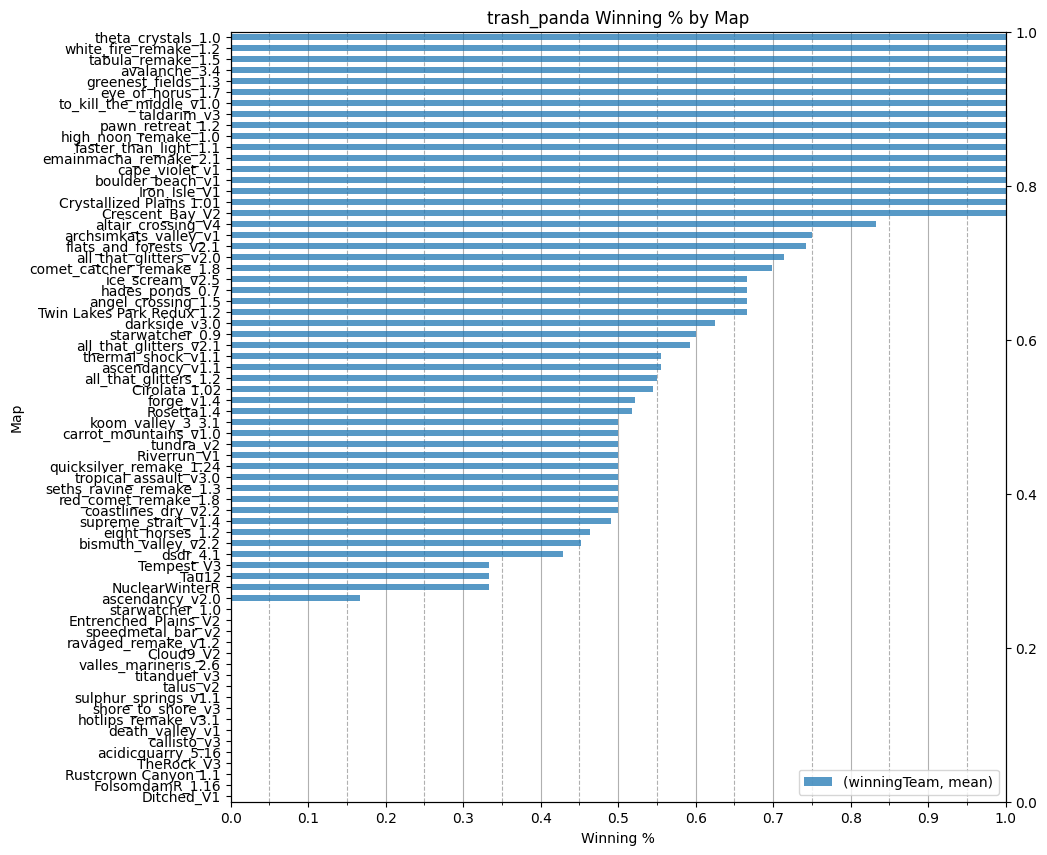

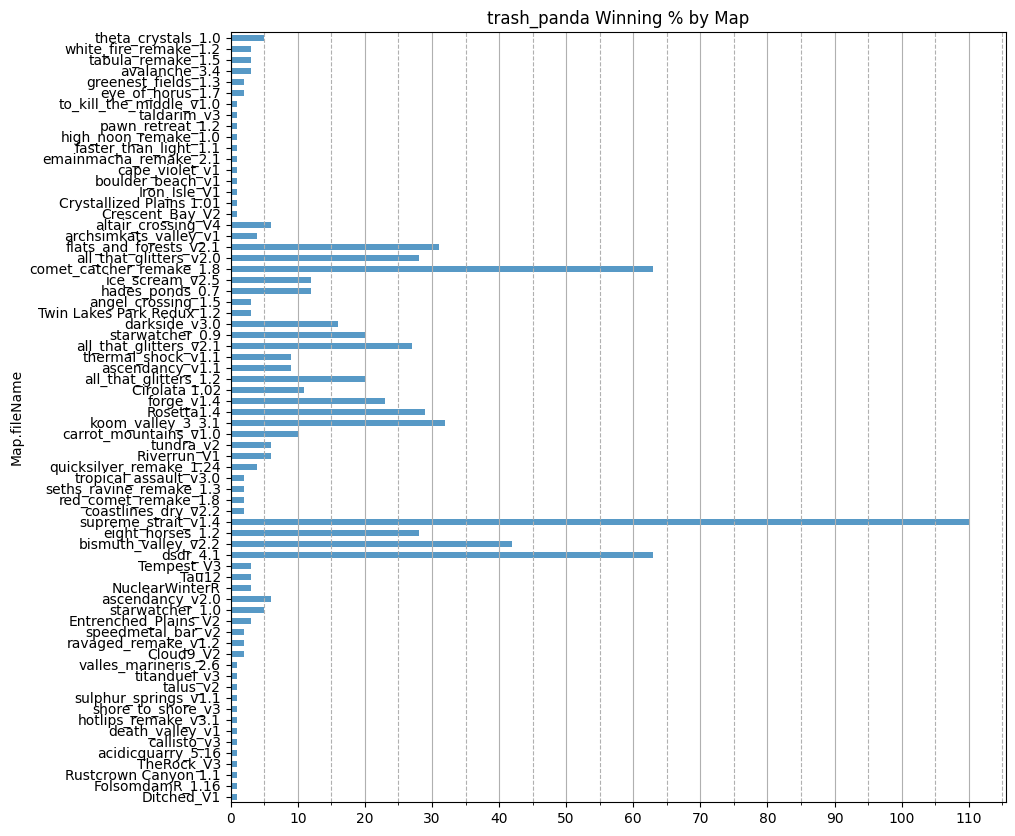

In [192]:
# Get the winning % for each map sorted by winning % and number of games played
# Set larger figure size

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rcParams["figure.figsize"] = (10, 10)

win_rate = (
    df.groupby(["Map.fileName"])
    .agg({"winningTeam": ["mean", "count"]})
    .sort_values([("winningTeam", "mean"), ("winningTeam", "count")], ascending=True)
)

# Use win_rate and plot the winning % for each map with the number of games played with horizontal bars and subdivide the bars by the winning team
# with minor locator for the x axis. Color by count and winningTeam.

# Set the x axis minor locator to 5 and major locator to 10

fig = plt.figure(figsize=(8, 6))

ax = win_rate.plot.barh(
    y=("winningTeam", "mean"),
    secondary_y=("winningTeam", "count"),
    alpha=0.75,
    legend=False,
    title=f"{user} Winning % by Map",
)

ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.grid(which="minor", axis="x", linestyle="--")
ax.grid(which="major", axis="x", linestyle="-")
ax.set_xlabel("Winning %")
ax.set_ylabel("Map")
ax.set_xlim(0, 1)

ax.set_yticklabels(win_rate.index)
ax.set_axisbelow(True)
ax.legend(loc="lower right")

ax2 = ax.twinx()
ax2 = win_rate.plot.barh(
    y=("winningTeam", "count"),
    secondary_y=("winningTeam", "count"),
    alpha=0.75,
    legend=False,
    title=f"{user} Winning % by Map",
)
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax2.grid(which="minor", axis="x", linestyle="--")
ax2.grid(which="major", axis="x", linestyle="-")

plt.show()

In [189]:
win_rate

winningTeam      
                             mean count
Map.fileName                           
Ditched_V1                    0.0     1
FolsomdamR_1.16               0.0     1
Rustcrown Canyon 1.1          0.0     1
TheRock_V3                    0.0     1
acidicquarry_5.16             0.0     1
...                           ...   ...
greenest_fields_1.3           1.0     2
avalanche_3.4                 1.0     3
tabula_remake_1.5             1.0     3
white_fire_remake_1.2         1.0     3
theta_crystals_1.0            1.0     5

[70 rows x 2 columns]

In [190]:
# Get the overall win rate

df["winningTeam"].mean() * 100

54.596888260254595

In [191]:
# Get the winning % for each map sorted by winning % and number of games played

df.groupby(['Map.fileName','winningTeam']).size().unstack().fillna(0).apply(lambda x: x / x.sum(), axis=1)

# df.groupby(["Map.fileName"]).agg({"winningTeam": ["count", "mean"]}).sort_values(
#     [("winningTeam", "mean")], ascending=False
# )

winningTeam,False,True
Map.fileName,,
Cirolata 1.02,0.454545,0.545455
Cloud9_V2,1.000000,0.000000
Crescent_Bay_V2,0.000000,1.000000
Crystallized Plains 1.01,0.000000,1.000000
Ditched_V1,1.000000,0.000000
...,...,...
to_kill_the_middle_v1.0,0.000000,1.000000
tropical_assault_v3.0,0.500000,0.500000
tundra_v2,0.500000,0.500000
